<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [2]:
## Write your code here
summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
summary['Non-Null Count'] = df.count()
summary['Missing Values'] = df.isnull().sum()
with pd.option_context('display.max_rows', 200):
    print(summary.sort_values(by='Missing Values', ascending=False))

                               Data Type  Non-Null Count  Missing Values
AINextMuch less integrated        object            1148           64289
AINextLess integrated             object            2355           63082
AINextNo change                   object           12498           52939
AINextMuch more integrated        object           13438           51999
EmbeddedAdmired                   object           16733           48704
EmbeddedWantToWorkWith            object           17600           47837
EmbeddedHaveWorkedWith            object           22214           43223
ConvertedCompYearly              float64           23435           42002
AIToolNot interested in Using     object           24414           41023
AINextMore integrated             object           24428           41009
Knowledge_9                       object           27635           37802
Frequency_3                       object           27710           37727
Knowledge_8                       object           

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [ ]:
## Write your code here
# from the above summary we can see which columns are missing how many values
# but there's nothing to do before we decide to focus on which particular columns for analysis

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [116]:
## Write your code here
for col in ['Employment', 'JobSat', 'YearsCodePro', 'Age']:
    print(df[col].value_counts())

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


<Axes: xlabel='JobSat', ylabel='Count'>

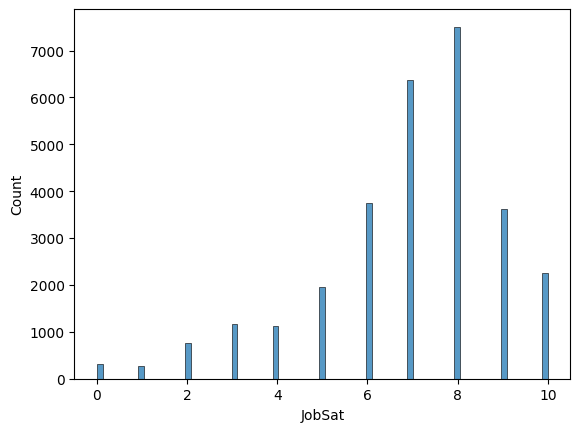

In [17]:
## Write your code here
#sns.kdeplot(data=df, x='JobSat')
sns.histplot(data=df, x='JobSat')

Job satisfaction is generally high, most scoring 8 out of 10, with 7/10 and 6/10 in 2nd and 3rd place, 9/10 and 10/10 in 4th and 5th.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [31]:
## Write your code here
df_lang_have = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';').sum()
df_lang_want = df['LanguageWantToWorkWith'].str.get_dummies(sep=';').sum()

In [109]:
df2 = pd.DataFrame(df_lang_have, columns=['Have'])
df2['Want'] = df_lang_want

Text(0.5, 1.0, 'Programming Languages that People Have Worked With or Want to Work With')

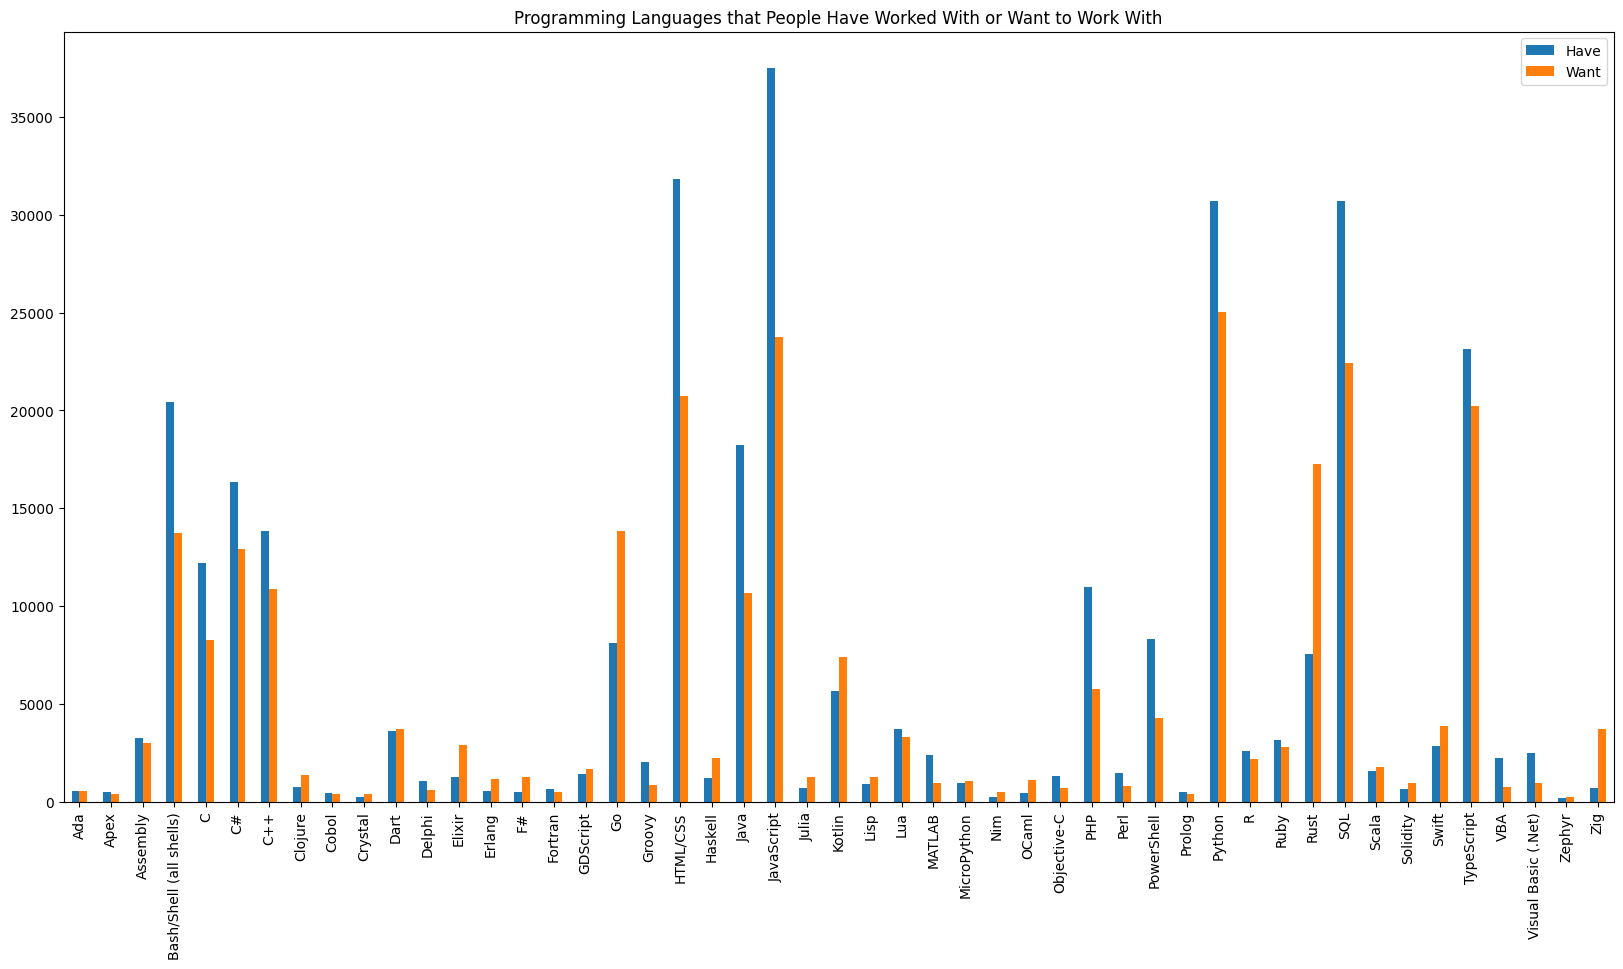

In [110]:
df2.plot.bar(figsize = (20,10))
plt.title('Programming Languages that People Have Worked With or Want to Work With')

### Step 7: Analyze Remote Work Trends

- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [79]:
# shorten some names
df['RemoteWork'] = df['RemoteWork'].replace('Hybrid (some remote, some in-person)', 'Hybrid')
df.loc[:,'Country'] = df['Country'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Hong Kong (S.A.R.)': 'HK',
})

In [111]:
c_list = [
    'USA',
    'Germany',
    'India',
    'UK',
    #'France',
    'Canada',
    #'Ukraine',
    #'Poland',
    #'Netherlands',
    #'Italy',
    #'Brazil',
    'Australia',
    #'Spain',
    'Sweden',
    #'Switzerland',
    #'Austria',
    #'Russian Federation',
    #'Czech Republic',
    #'Belgium',
    'Israel',
    #'Turkey',
    'Denmark',
    #'Portugal',
    #'Mexico',
    #'Norway',
    #'Indonesia',
    'China',
    #'Finland',
    'Japan',
    'Taiwan',
    'HK',
    'Singapore',
]
# select countries to analyze
df3 = df[df['Country'].isin(c_list)]

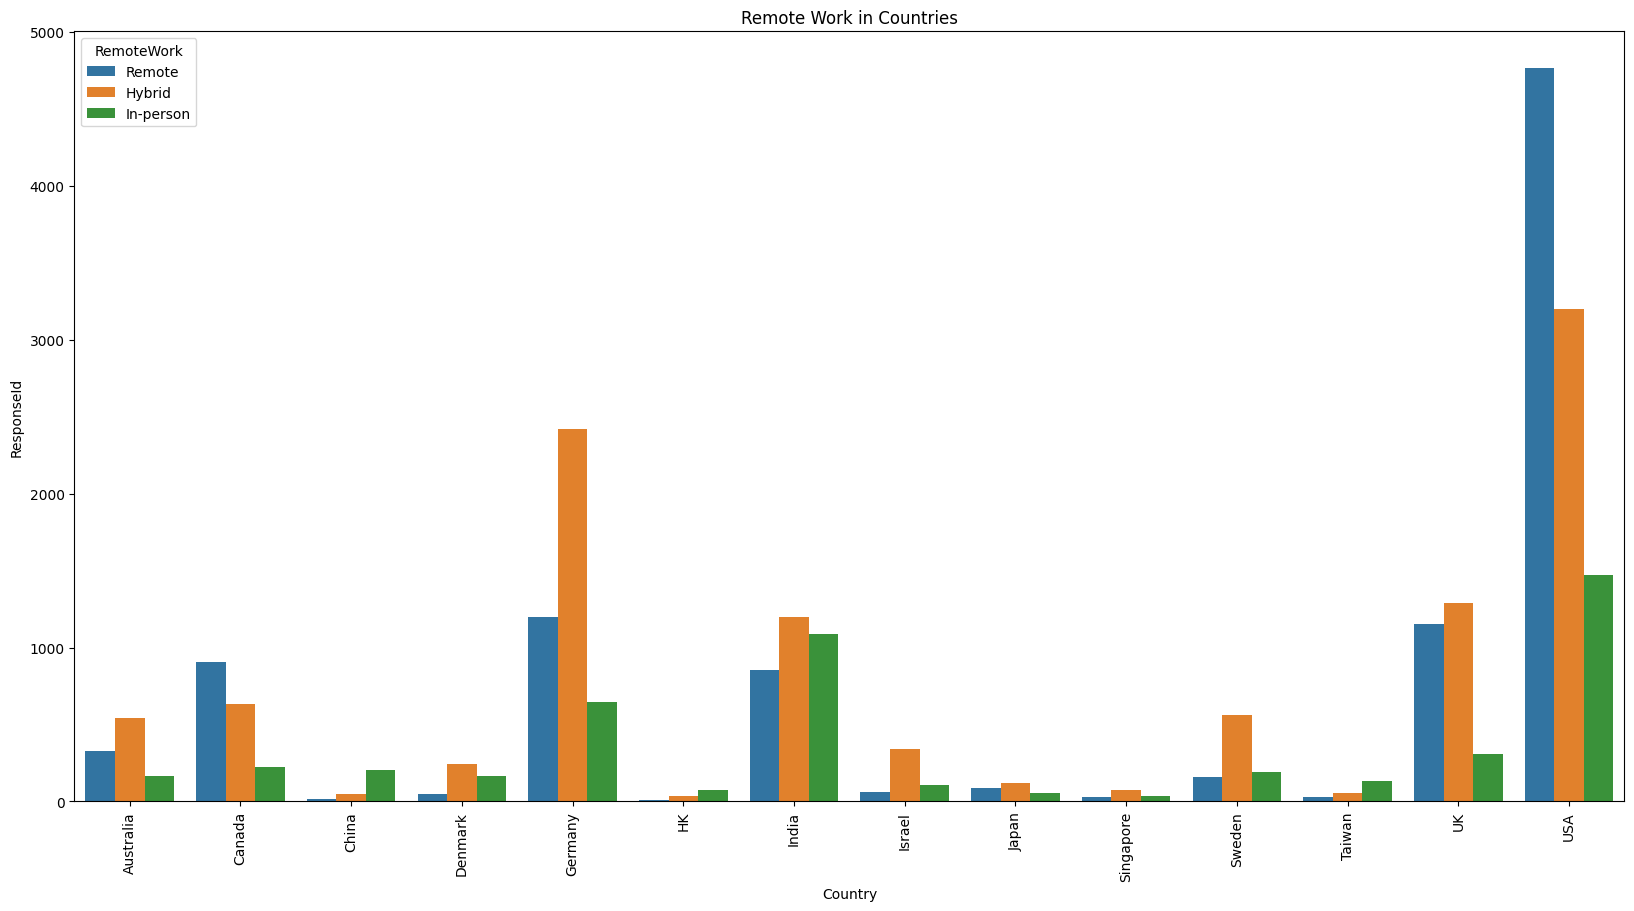

In [112]:
## Write your code here
# using the Seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(data=df3.groupby(['Country', 'RemoteWork'])['ResponseId'].count().reset_index(),
            x='Country',
            y='ResponseId',
            hue='RemoteWork',
            hue_order=['Remote', 'Hybrid', 'In-person'])
plt.xticks(rotation=90)
plt.title('Remote Work in Countries')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Remote Work in Countries')

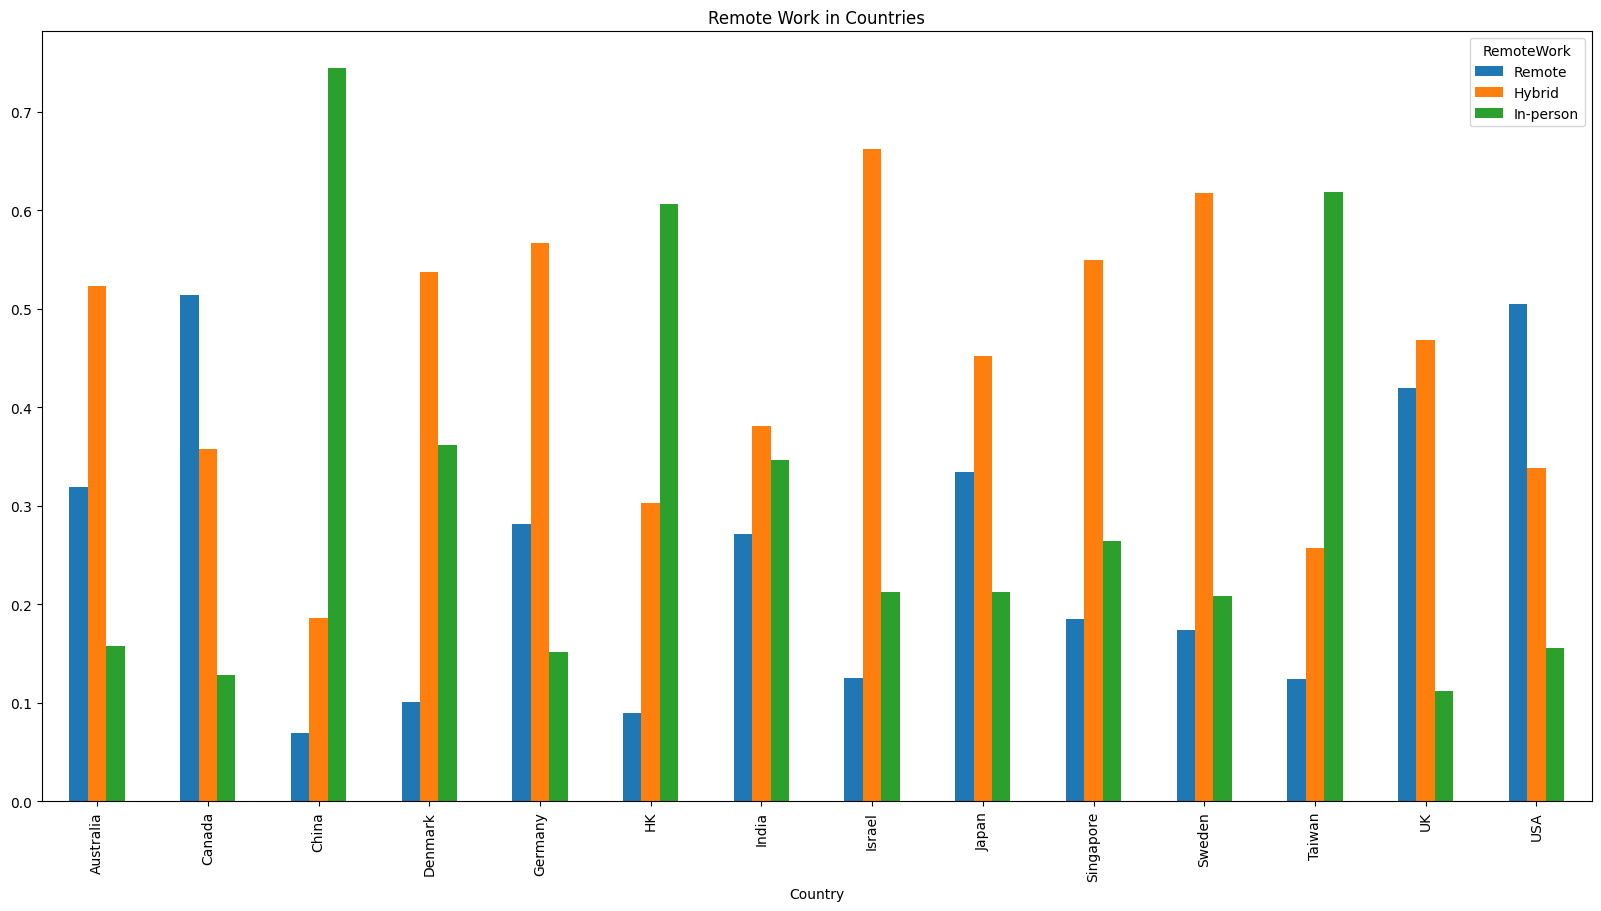

In [86]:
# better: using crosstab to normalize numbers across countries
ct = pd.crosstab(index=df3['Country'], columns=df3['RemoteWork'], normalize='index').reindex(columns=['Remote', 'Hybrid', 'In-person'])
ct.plot.bar(figsize = (20,10))
plt.title('Remote Work in Countries')

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


<Axes: xlabel='CodingYears', ylabel='JobSat'>

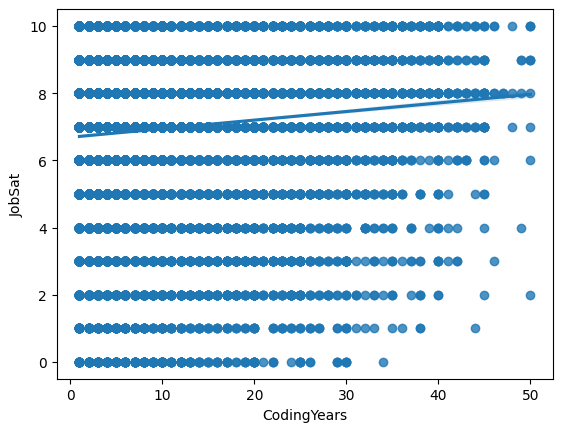

In [114]:
## Write your code here
# clean up, drop NAs
df4 = df[['YearsCodePro', 'JobSat']].dropna()
df4['CodingYears'] = df4['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
df4['JobSat'] = df4['JobSat'].astype(int)
#sns.scatterplot(x="CodingYears", y="JobSat", data=df2)
sns.regplot(data=df4, x='CodingYears', y='JobSat')
#weighted = df4.groupby(['CodingYears', 'JobSat']).count().reset_index()
#sns.scatterplot(data=weighted, x='CodingYears', y='JobSat', size='YearsCodePro', hue='CodingYears', legend=False)

In [99]:
# using numpy
import numpy as np
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(df2['CodingYears'], df2['JobSat'])

# The Pearson correlation coefficient is the off-diagonal value
correlation_coefficient = correlation_matrix[0, 1]

print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")

Pearson Correlation Coefficient (r): 0.1042


In [102]:
# using scipy
import scipy.stats as stats
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(df2['CodingYears'], df2['JobSat'])

print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of p-value (common threshold 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient (r): 0.1042
P-value: 0.0000
The correlation is statistically significant.


In [101]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(df2['CodingYears'], df2['JobSat'])
print(f"Spearman Correlation: {correlation:.4f}, P-value: {p_value:.4f}")

Spearman Correlation: 0.1192, P-value: 0.0000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [105]:
## Write your code here
df_encoded = df['Employment'].str.get_dummies(sep=';')
df6 = pd.concat([pd.DataFrame(df['EdLevel'].replace({
    'Primary/elementary school': 'Primary',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary',
    'Some college/university study without earning a degree': 'Post-secondary',
    'Associate degree (A.A., A.S., etc.)': 'Associate',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional',
})), df_encoded], axis=1).dropna()
df6.drop(df6[df6['EdLevel'] == 'Something else'].index, inplace=True)

In [107]:
# print the normalized crosstabs
for n in df_encoded.columns:
    print(pd.crosstab(index=df6['EdLevel'], columns=df6[n], normalize='index').reindex(
        ['Primary','Secondary','Post-secondary', 'Associate', 'Bachelor', 'Master', 'Professional']))

Employed, full-time         0         1
EdLevel                                
Primary              0.824607  0.175393
Secondary            0.678923  0.321077
Post-secondary       0.412626  0.587374
Associate            0.297267  0.702733
Bachelor             0.232780  0.767220
Master               0.197210  0.802790
Professional         0.221549  0.778451
Employed, part-time         0         1
EdLevel                                
Primary              0.931065  0.068935
Secondary            0.892456  0.107544
Post-secondary       0.912560  0.087440
Associate            0.923592  0.076408
Bachelor             0.946115  0.053885
Master               0.951597  0.048403
Professional         0.949832  0.050168
I prefer not to say         0         1
EdLevel                                
Primary              0.955497  0.044503
Secondary            0.984119  0.015881
Post-secondary       0.993334  0.006666
Associate            0.994980  0.005020
Bachelor             0.996151  0.003849


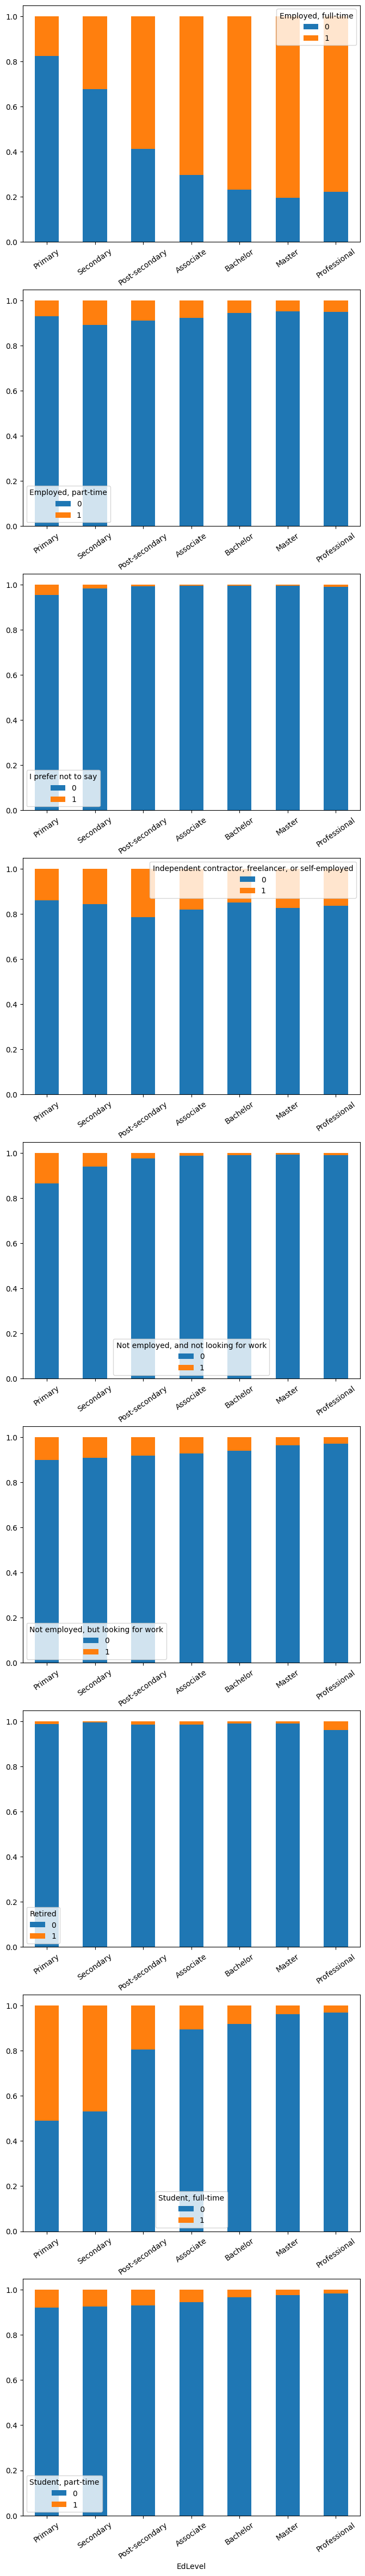

In [108]:
# display stacked bar plots
e_types = list(df_encoded.columns)
total = len(e_types)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(8, 60))
for idx, name in zip(list(range(total)), e_types):
    ct = pd.crosstab(index=df6['EdLevel'], columns=df6[name], normalize='index').reindex(
        ['Primary','Secondary','Post-secondary', 'Associate', 'Bachelor', 'Master', 'Professional'])
    ct.plot(kind='bar', stacked=True, rot=0, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=35)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [115]:
## Write your code here
df.to_csv('df_str_replaced.csv')
df2.to_csv('LangHaveWant.csv')
df3.to_csv('SelectCountries.csv')
df4.to_csv('YearsJobSat.csv')
df6.to_csv('Ed_Employ.csv')

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
